# Plotting Brownian motion and anomalous diffusion

The aim of this notebook is to plot 3 different types of diffusive motion. These are: 

    - Brownian motion: standard diffusion model of a particle in liquids
    
    - Fractional Brownian Motion: Brownian motion in a viscoelastic solution where a reversal of direction of motion is more likely than any other change. 
    
    - Continuous time random walk - Absorption or desorption mediated diffusion, where a particle is stationary or only moves small distances when absorbed to a surface, but when released can diffuse a large distance  
    
The first two of these can be easily modelled using the Python library stochastic, while the third requires custom code. 

In [2]:
pip install stochastic


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import matplotlib
matplotlib.rcParams['font.size']=30
matplotlib.rcParams['axes.linewidth'] = 4
matplotlib.rcParams['lines.linewidth'] = 4
import matplotlib.pyplot as plt

### For Brownian motion: 

Each time this code is run, a random Brownian motion event is calculated. 

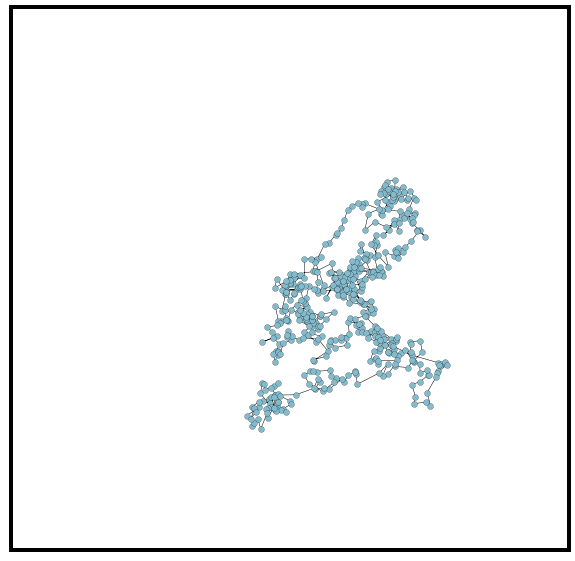

In [38]:
from stochastic.processes.continuous import BrownianMotion
bmx = BrownianMotion(t=2)
sx= bmx.sample(500)
times = bmx.times(1000)

bmy = BrownianMotion(t=2)
sy= bmy.sample(500)

#times = fbmx.times(100)
plt.figure(figsize=(10,10))
plt.plot(sx, sy, color='black', linewidth=0.5, zorder=0)
for x in  range(len(sx)):
    #print(sx[x], sy[x])
    plt.scatter(sx[x], sy[x], s=35, c='#83BACC',edgecolor='black', linewidths=0.2)

plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.xticks([])
plt.yticks([])
plt.show()
    

### Fractional Brownian Motion

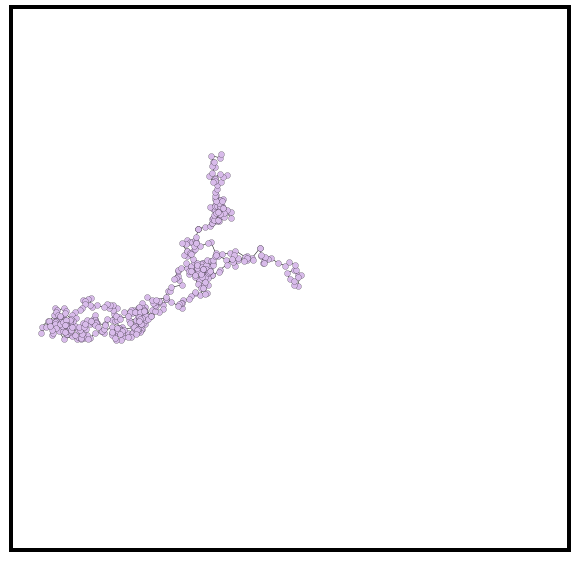

In [35]:
from stochastic.processes.continuous import FractionalBrownianMotion
fbmx = FractionalBrownianMotion(hurst=0.6, t=2)
sx= fbmx.sample(500)
times = fbmx.times(200)

fbmy = FractionalBrownianMotion(hurst=0.6, t=2)
sy= fbmy.sample(500)
#times = fbmx.times(100)
plt.figure(figsize=(10,10))

for x in  range(len(sx)):
    #print(sx[x], sy[x])
    plt.scatter(sx[x], sy[x], s=35, c='#D8BBEA',edgecolor='black', linewidths=0.2)

plt.plot(sx, sy, color='black', linewidth=0.5, zorder=0)
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.xticks([])
plt.yticks([])
plt.show()

### Continuous-time random walk 

The stochastic library does include a random walk method, however this only works in one-dimension and cannot be simply combined like the others, as the large steps either become completely horizontal or vertical. 

Therefore I have defined by own process as follows: 

In [27]:
import random 
import numpy as np
import math

def random_walk(n): 
    '''
    This creates a 2D random walk process. Steps are defined at the start of the function, \
    while the weights for each potential step is defined in the following line. 
    
    Parameters: number of sample points
    returns: 2D array of coordinates 
    '''
    positions=[[0,0]]
    
    steps = [0,0.1,0.2,0.3,4,5]
    weights = [100,80,60,15,1,1]
    
    e = sum(weights)
    #print(e)
    cumul_weights = [weights[0]]
    
    for i in range(1,len(weights)):
        cumul_weights.append(cumul_weights[-1]+weights[i])
    #print(cumul_weights)
    movements=[]
    for x in range(n-1):
        j = random.randint(0,e)
        for i in range(len(cumul_weights)):
            if j<cumul_weights[i]:
                break
        movement= steps[i]
        previous_position = positions[-1]
        next_position = move_coordinates(previous_position[0],previous_position[1], movement)
        positions.append(next_position)
    
    return np.array(positions)
                    
def move_coordinates(x, y, distance):             
    '''
    Move coordinates in a random direction from starting position x, y by a set distance. 
    
    Parameters: Current x, current y and distance 
    Returns: New coordinates
    '''
    angle = np.random.uniform(0, 2*math.pi)  # Generate a random angle between 0 and 2*pi
    dx = distance * math.cos(angle)  # Calculate the change in x-coordinate
    dy = distance * math.sin(angle)  # Calculate the change in y-coordinate
    new_x = x + dx  # Calculate the new x-coordinate
    new_y = y + dy  # Calculate the new y-coordinate
    return [new_x, new_y]
                    
                    
positions = random_walk(1000)


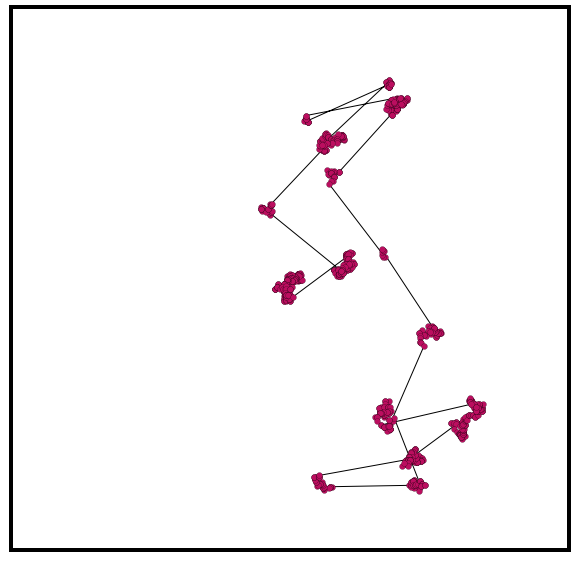

In [28]:
positions = random_walk(1000)
x = positions[:,0]
y = positions[:,1]
plt.figure(figsize=(10,10))
plt.plot(x, y, color='black', linewidth=1, zorder=0)
for i in  range(len(x)):
    #print(sx[x], sy[x])
    plt.scatter(x[i], y[i], s=35, c='#BB0E5F',edgecolor='black', linewidths=0.2)

    

plt.xlim(-15,15)
plt.ylim(-15,15)
plt.xticks([])
plt.yticks([])
plt.show()
    